In [1]:
def Merge(x, y):
  n = len(x)
  m = len(y)
  ix = 0
  iy = 0
  z = []
  for iz in range(n+m):
      if ix > n - 1:
        z.append(y[iy])
        iy += 1
      elif iy > m - 1:
        z.append(x[ix])
        ix += 1
      elif x[ix] <= y[iy]:
        z.append(x[ix])
        ix += 1
      elif x[ix] > y[iy]:
        z.append(y[iy])
        iy += 1
  return z

a = [1, 3, 5, 7, 9]
b = [2, 4, 7, 8, 10]
print(Merge(a, b))

[1, 2, 3, 4, 5, 7, 7, 8, 9, 10]


In [2]:
def MergeSort(a):
  n = len(a)
  if n == 1:
    return a
  else:
    mid = n // 2
    # Tách thành hai phần
    u0 = list(a[:mid])
    u1 = list(a[mid:])
    # Sort từng
    x = MergeSort(u0)
    y = MergeSort(u1)
    return Merge(x, y)

import random
# x = [1, 3, 5, 7, 9, 2, 4, 6, 8, 10]
x = []
for i in range(10):
  x.append(random.randint(1, 10))
x = MergeSort(x)
x

[1, 1, 2, 2, 3, 4, 4, 4, 5, 10]

In [3]:
# prompt: Create the functions for linear sort, selection sort, binary sort, merge sort and Tim sort

import random
def Merge(x, y):
  n = len(x)
  m = len(y)
  ix = 0
  iy = 0
  z = []
  for iz in range(n+m):
      if ix > n - 1:
        z.append(y[iy])
        iy += 1
      elif iy > m - 1:
        z.append(x[ix])
        ix += 1
      elif x[ix] <= y[iy]:
        z.append(x[ix])
        ix += 1
      elif x[ix] > y[iy]:
        z.append(y[iy])
        iy += 1
  return z

def MergeSort(a):
  n = len(a)
  if n == 1:
    return a
  else:
    mid = n // 2
    u0 = list(a[:mid])
    u1 = list(a[mid:])
    x = MergeSort(u0)
    y = MergeSort(u1)
    return Merge(x, y)

def linear_sort(arr):
    """Sorts a list of integers using linear sort (counting sort)."""
    if not arr:
      return []
    max_val = max(arr)
    min_val = min(arr)
    range_val = max_val - min_val + 1
    count = [0] * range_val
    output = [0] * len(arr)
    for num in arr:
        count[num - min_val] += 1
    for i in range(1, range_val):
        count[i] += count[i - 1]
    for i in range(len(arr) - 1, -1, -1):
        output[count[arr[i] - min_val] - 1] = arr[i]
        count[arr[i] - min_val] -= 1
    return output

def selection_sort(arr):
    """Sorts a list using selection sort."""
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


def binary_insertion_sort(arr):
    """Sorts a list using binary insertion sort."""
    for i in range(1, len(arr)):
        key = arr[i]
        left, right = 0, i - 1
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] < key:
                left = mid + 1
            else:
                right = mid - 1
        for j in range(i, left, -1):
            arr[j] = arr[j - 1]
        arr[left] = key
    return arr


def timsort(arr):
    """Sorts a list using the built-in timsort algorithm (Python's default)."""
    return sorted(arr)  # Python's sorted() uses Timsort

# Example usage
x = []
for i in range(10):
  x.append(random.randint(1, 10))

print("Original array:", x)
print("Merge Sort:", MergeSort(x))
print("Linear Sort:", linear_sort(x))
print("Selection Sort:", selection_sort(x.copy())) # Use a copy to avoid modifying the original list
print("Binary Insertion Sort:", binary_insertion_sort(x.copy()))
print("Tim Sort:", timsort(x.copy()))

Original array: [6, 8, 10, 1, 8, 6, 5, 8, 2, 7]
Merge Sort: [1, 2, 5, 6, 6, 7, 8, 8, 8, 10]
Linear Sort: [1, 2, 5, 6, 6, 7, 8, 8, 8, 10]
Selection Sort: [1, 2, 5, 6, 6, 7, 8, 8, 8, 10]
Binary Insertion Sort: [1, 2, 5, 6, 6, 7, 8, 8, 8, 10]
Tim Sort: [1, 2, 5, 6, 6, 7, 8, 8, 8, 10]


In [5]:
# Exercise 2: Compare the performance of the sorting algorithms

import random
import time

def Merge(x, y):
    u = list(x)
    v = list(y)
    z = []
    while len(u) > 0 and len(v) > 0:
        if u[0] <= v[0]:
            g = u.pop(0)
        else:
            g = v.pop(0)
        z.append(g)
    z.extend(u)
    z.extend(v)
    return z

def MergeSort(a):
    n = len(a)
    if n == 1:
        return a
    else:
        m = n//2
        u0 = a[:m]
        u1 = a[m:]
        y0 = MergeSort(u0)
        y1 = MergeSort(u1)
        return Merge(y0, y1)

def linear_sort(a):
    if not a:
      return []
    for i in range(len(a)-1):
      for j in range(i + 1, len(a)):
          if a[i] > a[j]:
              a[i], a[j] = a[j], a[i]
    return a

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def binary_insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        left, right = 0, i - 1
        while left <= right:
            mid = (left + right) // 2
            if arr[mid] < key:
                left = mid + 1
            else:
                right = mid - 1
        for j in range(i, left, -1):
            arr[j] = arr[j - 1]
        arr[left] = key
    return arr

def timsort(arr):
    return sorted(arr)

# Example usage and time measurement
x = []
for i in range(1000):  # Increased array size for better performance comparison
    x.append(random.randint(1, 1000))

algorithms = {
    "Linear Sort": linear_sort,
    "Merge Sort": MergeSort,
    "Selection Sort": selection_sort,
    "Binary Insertion Sort": binary_insertion_sort,
    "Tim Sort": timsort
}

for name, algorithm in algorithms.items():
    arr_copy = x[:] # Create a copy for each sort
    # print(arr_copy[0])
    start_time = time.time()
    if name == "Linear Sort":
      algorithm(arr_copy) # Linear sort modifies original
    else:
      algorithm(arr_copy.copy()) # Other sorts need a copy
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name}: {elapsed_time:.6f} seconds")

Linear Sort: 0.047902 seconds
Merge Sort: 0.003023 seconds
Selection Sort: 0.029886 seconds
Binary Insertion Sort: 0.019949 seconds
Tim Sort: 0.000000 seconds


In [7]:
results = []
for i, num in enumerate([10, 100, 200, 300, 500, 1000, 10000]):
    results.append({})
    for name, algorithm in algorithms.items():
        x = []
        for j in range(num):
            x.append(random.randint(1, 1000))
        start_time = time.time()
        if name == "Linear Sort":
            algorithm(x)
        else:
            algorithm(x.copy())
        end_time = time.time()
        elapsed_time = end_time - start_time
        results[i][name] = elapsed_time
        if num == 1000:
            print(f"{name}: {elapsed_time:.6f} seconds")

Linear Sort: 0.052858 seconds
Merge Sort: 0.003986 seconds
Selection Sort: 0.027925 seconds
Binary Insertion Sort: 0.022929 seconds
Tim Sort: 0.000000 seconds


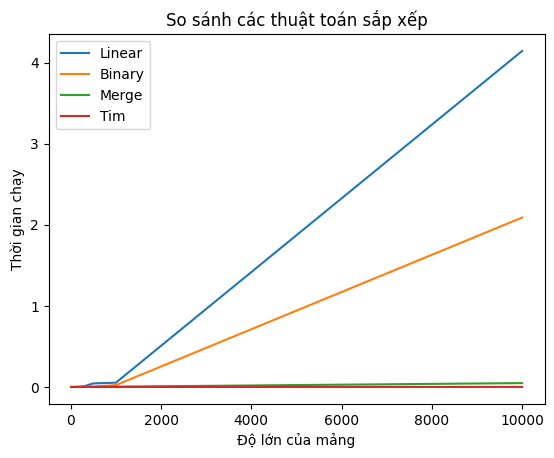

In [8]:
import matplotlib.pyplot as plt

x_linear = []
x_binary = []
x_merge = []
x_tim = []
y = [10, 100, 200, 300, 500, 1000, 10000]
for i, _ in enumerate([10, 100, 200, 300, 500, 1000, 10000]):
    x_linear.append(results[i]["Linear Sort"])
    x_binary.append(results[i]["Binary Insertion Sort"])
    x_merge.append(results[i]["Merge Sort"])
    x_tim.append(results[i]["Tim Sort"])

plt.plot(y, x_linear, label='Linear')
plt.plot(y, x_binary, label='Binary')
plt.plot(y, x_merge, label='Merge')
plt.plot(y, x_tim, label='Tim')
plt.xlabel("Độ lớn của mảng")
plt.ylabel("Thời gian chạy")
plt.legend()
plt.title("So sánh các thuật toán sắp xếp")
plt.show()

In [9]:
class Point:
    """
    Attributes:
        x: The x-coordinate of the point.
        y: The y-coordinate of the point.
    """

    def __init__(self, x, y):

        """
        Initializes a new Point object with the given x and y coordinates.

        Args:
            x: The x-coordinate of the point.
            y: The y-coordinate of the point.
        """
        print(1)
        self.x = x
        self.y = y

    def __str__(self):
        print(2)
        return f"({self.x}, {self.y}) ahaha"

    def __eq__(self, other):
        print(3)
        return self.x == other.x and self.y == other.y

    def __add__(self, other):
        print(4)
        return Point(self.x + other.x, self.y + other.y)